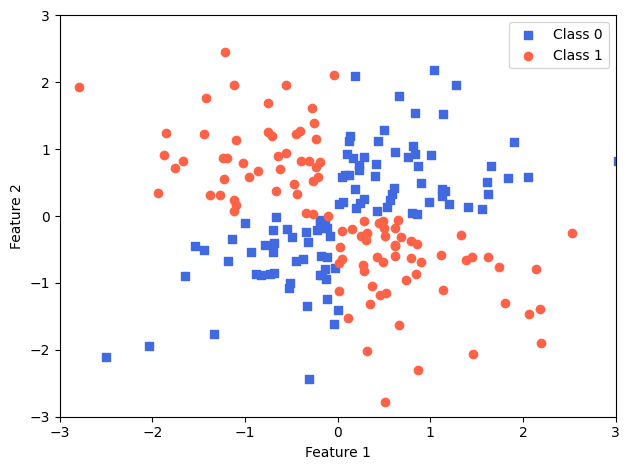

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 乱数シードを指定
np.random.seed(1)

# 標準正規分布に従う乱数で200行2列の可視データを生成
X_xor = np.random.randn(200, 2)

# XORラベルを生成（2つの特徴の正負が一致していれば0、一致しなければ1）
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

# ラベル0を表示（黒の◯）
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='royalblue', marker='s', label='Class 0')

# ラベル1を表示（青の×）
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='tomato', marker='o', label='Class 1')

# 軸の範囲とラベルを設定
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # グリッドポイントの等高線をプロット
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)

    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class{cl}',
                    edgecolor='black')
        
    # テストデータ点を目立たせる（点を○で表示）
    if test_idx:
        # すべてのテストデータ点をプロット
        X_test, y_test = X[test_idx], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', alpha=1.0, linewidths=1, marker='o', s=100, label='Test set', edgecolor='black')


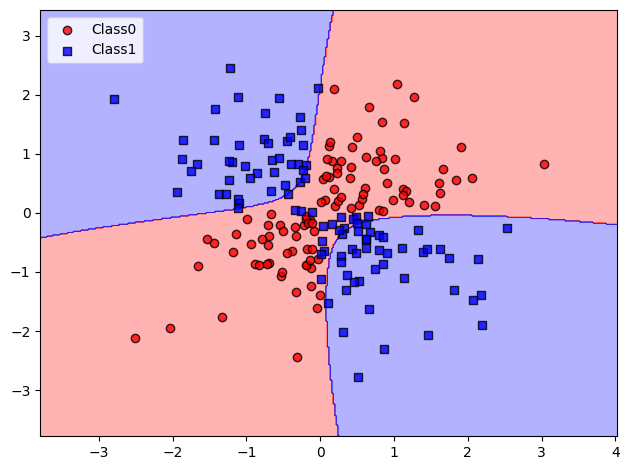

In [3]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0) # CはSVMの正則化パラメータ
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

RBFカーネル（Radial Basis Function kernel、**ガウスカーネル**とも呼ばれます）

$$
K(\mathbf{x}, \mathbf{x}') = \exp\left(-\frac{\|\mathbf{x} - \mathbf{x}'\|^2}{2\sigma^2}\right)
$$

または、別の表記でパラメータ $\gamma = \frac{1}{2\sigma^2}$ を用いると：

$$
K(\mathbf{x}, \mathbf{x}') = \exp\left(-\gamma \|\mathbf{x} - \mathbf{x}'\|^2\right)
$$

より高次元の空間へ射影する。

In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # we only take the first two features.
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # fit only on the training data
X_train_std = scaler.transform(X_train)  # transform training data
X_test_std = scaler.transform(X_test)  # transform test data using the same scaler

x_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

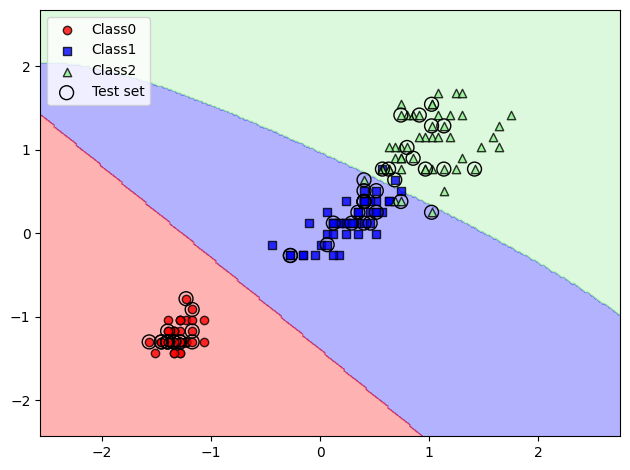

In [5]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(x_combined, y_combined, classifier=svm, test_idx=range(len(X_train_std), len(x_combined)))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

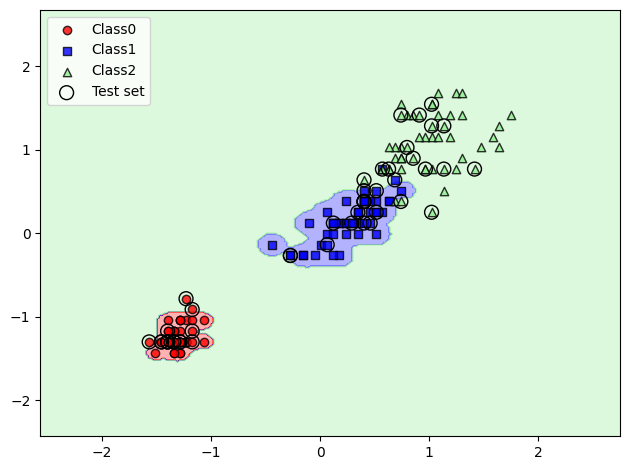

In [6]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(x_combined, y_combined, classifier=svm, test_idx=range(len(X_train_std), len(x_combined)))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()